<a href="https://colab.research.google.com/github/AliRafieePour/ML-applications-to-Renal-transplantation/blob/main/ML_Applications_in_Renal_Transplantation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

I am importing most of the libraries at once here.

In [ ]:
import pandas as pd
import numpy as np
import tensorflow as tf
import datetime
from keras.models import Sequential
from keras.layers import Dense, Activation, Flatten, Dropout
import os
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from matplotlib import pyplot as plt
import seaborn as sb
from keras.layers import LeakyReLU
from sklearn.svm import SVR
from sklearn.pipeline import make_pipeline
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error
from sklearn.datasets import load_digits
from sklearn.feature_selection import RFE
import matplotlib.pyplot as plt
from sklearn.svm import SVC
from sklearn.feature_selection import RFECV

In order to preprocess the data, including scaling the data, and spliting the data into validation, training, and testing, I have defined a function here to bundle the whole process.

In [ ]:
def preprocess(file):
  df = pd.read_excel(file)
  df = df[0:109]
  os.environ["CUDA_DEVICE_ORDER"] = "PCI_BUS_ID"   # see issue #152
  os.environ["CUDA_VISIBLE_DEVICES"] = ""
  dataset = df.values
  #[dataset[i].shape for i in range(len(dataset))]
  dataset = dataset[:109]
  dataset = np.array([[float(dataset[i][j]) for j in range(len(dataset[0]))] for i in range(len(dataset))])
  min_max_scaler = preprocessing.MinMaxScaler()
  X_scale = min_max_scaler.fit_transform(dataset)
  Y = dataset[:, -8:]
  X_scale = X_scale[:, :-8]
  X_train, X_val_and_test, Y_train, Y_val_and_test = train_test_split(X_scale, Y, test_size=0.3, shuffle= True)
  X_val, X_test, Y_val, Y_test = train_test_split(X_val_and_test, Y_val_and_test, test_size=0.5, shuffle = True)
  return X_train, Y_train, X_val, Y_val, X_test, Y_test


For the purpose of using the process of creating our model in other phases such as considering a hyperparameter search I have defined a function with which I will be tweaking some parts.

In [ ]:
def createModel(numLayers, shapeLayers):
  model = tf.keras.Sequential()
  for i in range(numLayers):
    if i == 0:
      model.add(tf.keras.layers.Dense(shapeLayers[i], input_shape=(46,)))
      model.add(LeakyReLU(alpha=0.2))
      model.add(tf.keras.layers.Dropout(0.3))
    elif i!=0 and i!=numLayers -1:
      model.add(tf.keras.layers.Dense(shapeLayers[i]))
      model.add(LeakyReLU(alpha=0.2))
      model.add(tf.keras.layers.Dropout(0.3))
    elif i == numLayers - 1:
      model.add(tf.keras.layers.Dense(shapeLayers[-1]))
  return model

In [ ]:
def compileModel(model, optimiser = 'adam', loss = 'mean_squared_error'):
  model.compile(optimizer=optimiser,
                loss=loss)
  return model

In [ ]:
def train_and_validate(X_train, Y_train, X_val, Y_val):
  hist = model.fit(X_train, Y_train,
                  validation_data=(X_val, Y_val),
                    batch_size=8, epochs=250,)
  return hist, model

In [ ]:
def plot(hist):
  plt.plot(hist.history['val_loss'], color='red')
  plt.plot(hist.history['loss'], color='green')
  plt.legend(['test', 'train'])

I have seen significant increase in the model's performance by simply tweaking optimization algorithms between Nadam, Adam, RMSprop, Adagrad ...

In [ ]:
X_train, Y_train, X_val, Y_val, X_test, Y_test = preprocess('V1_Reg.xlsx')
hists = []
for i in range(8):
  model = createModel(4, [35,25,35,8])
  model = compileModel(model, 'Nadam', 'MAE')
  hist, model = train_and_validate(X_train, Y_train[:, i], X_val, Y_val[:, i])
  hists.append(hist)

Epoch 1/250
10/10 [==============================] - 0s 14ms/step - loss: 45.7406 - val_loss: 48.2241
Epoch 2/250
10/10 [==============================] - 0s 3ms/step - loss: 45.5788 - val_loss: 47.9780
Epoch 3/250
10/10 [==============================] - 0s 3ms/step - loss: 45.2940 - val_loss: 47.5070
Epoch 4/250
10/10 [==============================] - 0s 3ms/step - loss: 44.5444 - val_loss: 46.5117
Epoch 5/250
10/10 [==============================] - 0s 3ms/step - loss: 43.4383 - val_loss: 44.6663
Epoch 6/250
10/10 [==============================] - 0s 3ms/step - loss: 41.1447 - val_loss: 40.9258
Epoch 7/250
10/10 [==============================] - 0s 3ms/step - loss: 35.2945 - val_loss: 33.5177
Epoch 8/250
10/10 [==============================] - 0s 4ms/step - loss: 28.8239 - val_loss: 24.5318
Epoch 9/250
10/10 [==============================] - 0s 2ms/step - loss: 20.6832 - val_loss: 17.6980
Epoch 10/250
10/10 [==============================] - 0s 3ms/step - loss: 18.5113 - val_lo

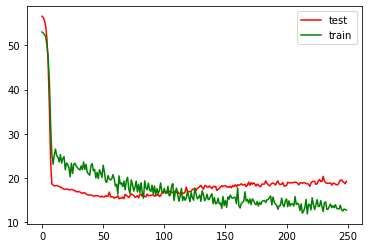

In [ ]:
plot(hists[7])

In [ ]:
X_train, Y_train, X_val, Y_val, X_test, Y_test = preprocess('V1_Reg.xlsx')

model = createModel(4, [35,25,35,8])
model = compileModel(model, 'Nadam', 'MAE')
hist, model = train_and_validate(X_train, Y_train, X_val, Y_val)

Epoch 1/250
10/10 [==============================] - 0s 10ms/step - loss: 50.5429 - val_loss: 55.8322
Epoch 2/250
10/10 [==============================] - 0s 3ms/step - loss: 50.3314 - val_loss: 55.5151
Epoch 3/250
10/10 [==============================] - 0s 3ms/step - loss: 49.9333 - val_loss: 54.8496
Epoch 4/250
10/10 [==============================] - 0s 3ms/step - loss: 48.9702 - val_loss: 53.3226
Epoch 5/250
10/10 [==============================] - 0s 3ms/step - loss: 47.2219 - val_loss: 50.1286
Epoch 6/250
10/10 [==============================] - 0s 3ms/step - loss: 43.2416 - val_loss: 43.6535
Epoch 7/250
10/10 [==============================] - 0s 3ms/step - loss: 35.9021 - val_loss: 32.3983
Epoch 8/250
10/10 [==============================] - 0s 3ms/step - loss: 26.6133 - val_loss: 20.5261
Epoch 9/250
10/10 [==============================] - 0s 3ms/step - loss: 25.0888 - val_loss: 17.1673
Epoch 10/250
10/10 [==============================] - 0s 3ms/step - loss: 21.2191 - val_lo

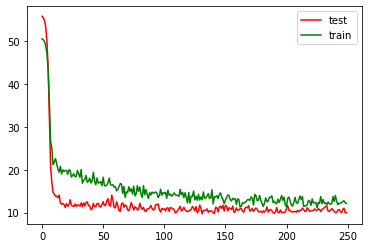

In [ ]:
plot(hist)


I am checking the performance of random forests!

Random forest validation MAE =  9.887067798088589


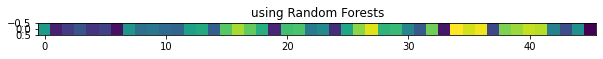

In [ ]:
model = RandomForestRegressor(criterion='mae')
model.fit(X_train[:, 1:],Y_train)

# Get the mean absolute error on the validation data
predicted_prices = model.predict(X_val[:, 1:])
MAE = mean_absolute_error(Y_val , predicted_prices)
print('Random forest validation MAE = ', MAE)

mylist = model.feature_importances_.copy()

listt = {}
for i in range(len(mylist)):
  listt[mylist[i]] = i

li = list(listt.keys())
li.sort()
li2 = np.zeros(46)
s= 46
for i in range(len(li)):
  li2[listt[li[i]]] = int(s)
  s -= 1
li2 = list(li2)
for i in range(len(li2)):
  li2[i] = int(li2[i])
li2 = np.array(li2)

fig, ax = plt.subplots(figsize = (10, 50))
plt.title('using Random Forests')
im = ax.imshow([li2])
im.autoscale()



Here I am checking the performance of the random forests for each column of the output separatly and plotting the ranking of each feature in the final result using the structure of random forests themselves.

Random forest validation MAE =  7.401465624999991
Random forest validation MAE =  3.47325624999999
Random forest validation MAE =  10.926624999999998
Random forest validation MAE =  7.546024999999997
Random forest validation MAE =  10.442115624999996
Random forest validation MAE =  7.226374999999997
Random forest validation MAE =  11.942662682038826
Random forest validation MAE =  10.604815048543689


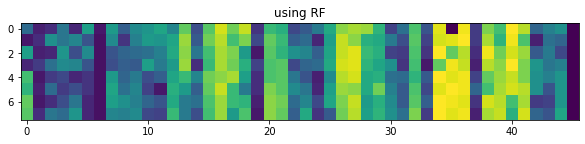

In [ ]:
dd = []
for n in range(8):
  model = RandomForestRegressor(criterion='mae')
  model.fit(X_train[:,1:],Y_train[:,n])

  # Get the mean absolute error on the validation data
  predicted_prices = model.predict(X_val[:, 1:])
  MAE = mean_absolute_error(Y_val[:,n] , predicted_prices)
  print('Random forest validation MAE = ', MAE)

  mylist = model.feature_importances_.copy()

  listt = {}
  for i in range(len(mylist)):
    listt[mylist[i]] = i

  li = list(listt.keys())
  li.sort()
  li2 = np.zeros(46)
  s= 46
  for i in range(len(li)):
    li2[listt[li[i]]] = int(s)
    s -= 1
  li2 = list(li2)
  for i in range(len(li2)):
    li2[i] = int(li2[i])
  li2 = np.array(li2)
  dd.append(li2)
fig, ax = plt.subplots(figsize = (10, 50))
plt.title('using RF')
im = ax.imshow(dd)
im.autoscale()



In [ ]:
df = pd.read_excel('V1_Reg.xlsx')
head = list(df.columns)


In [ ]:
l1 = []
for j in dd:
  for i in range(0 ,21):
    for k in range(len(j)):
      if (j[k] == i):
        print(head[k])
  print("____")

mTOR_Protocol
TACCDRatio
BMI
Sex
Weight
Age
Donor_type
mTOR_Level
D_Inotrpe
Sex_Similarity
Dialysis_Type
DGF
D_Height
TACDD
PCR2group
ATG
D_Cr
Height
D_Weight
TACDkg
____
TACCDRatio
BMI
ATG
PCR2group
D_Weight
Sex
TACDD
mTOR_Level
DGF
Donor_type
D_Cr
IBW
Dialysis_Type
Sex_Similarity
TACC
D_Height
TACDkg
Height
D_Inotrpe
TACDDkg
____
TACCDRatio
BMI
Donor_type
Sex
Age
mTOR_Level
DGF
D_Cr
D_Inotrpe
TACC
Weight
SCrD
PCR2group
D_Weight
TACDD
TACDDkg
TACCD
Dialysis_Type
TACDkg
RatioD
____
TACCDRatio
BMI
DGF
mTOR_Level
ATG
Dialysis_Type
D_Cr
Sex
Donor_type
Sex_Similarity
SCrD
IBW
TACDDkg
TACDD
D_Height
D_Weight
Age
TACDkg
RatioD
TACC
____
TACCDRatio
BMI
Sex
D_Weight
Weight
Donor_type
IBW
Age
mTOR_Level
Height
TACCD
D_Height
DGF
RatioD
TACDD
D_Cr
D_Inotrpe
Sex_Similarity
TACDDkg
TACDkg
____
TACCDRatio
BMI
RatioD
Sex
D_Weight
Donor_type
IBW
Height
TACCD
DGF
Weight
TACDkg
D_Cr
Dialysis_Type
mTOR_Level
Age
TACDD
D_Height
Peak_PRA
D_Inotrpe
____
TACCDRatio
BMI
Sex
Donor_type
IBW
Age
mTOR_Level
PCR2

Working with SVR, here I have tried to make a comparable result with my other models!

In [ ]:
y_rbf = []
for i in range(0, len(Y_train[0])):
  svr_rbf = SVR(kernel='rbf', C=1e4, gamma=0.00067)
  y_rbf.append(svr_rbf.fit(X_train, Y_train[:,i]).predict(X_val))
y_predicted = []
for i in range(len(y_rbf[0])):
  y = []
  for j in range(len(y_rbf)):
    y.append(y_rbf[j][i])
  y_predicted.append(y)

sum = 0
counter = 0
sumVector = np.zeros(8)
for i in range(len(y_predicted)):
  for j in range(len(y_predicted[0])):
    sumVector[j] += np.abs(Y_val[i][j] - y_predicted[i][j])
    sum += np.abs(Y_val[i][j] - y_predicted[i][j])
    counter += 1
for i in range(len(sumVector)):  
  print(f"Mean absolute error: {sumVector[i]/(counter/8)}")

print("___")
print(f"Mean absolute error: {sum/counter}")



Mean absolute error: 6.23522338094243
Mean absolute error: 6.710505384407188
Mean absolute error: 10.457093658654614
Mean absolute error: 11.758264799263515
Mean absolute error: 12.874504333190451
Mean absolute error: 10.184271648690531
Mean absolute error: 14.6445112380068
Mean absolute error: 11.241715424374489
___
Mean absolute error: 10.51326123344125


In [ ]:
264/8

33.0

Checking SVR with another kernel

In [ ]:
y_poly = []
for i in range(0, len(Y_train[0])):
  svr_poly = SVR(kernel='poly', C=0.4, degree=6)
  y_poly.append(svr_poly.fit(X_train, Y_train[:,i]).predict(X_val))
y_predicted = []
for i in range(len(y_poly[0])):
  y = []
  for j in range(len(y_poly)):
    y.append(y_poly[j][i])
  y_predicted.append(y)

sum = 0
counter = 0
sumVector = np.zeros(8)
for i in range(len(y_predicted)):
  for j in range(len(y_predicted[0])):
    sumVector[j] += np.abs(Y_val[i][j] - y_predicted[i][j])
    sum += np.abs(Y_val[i][j] - y_predicted[i][j])
    counter += 1


for i in range(len(sumVector)):  
  print(f"Mean absolute error: {sumVector[i]/(counter/8)}")

print("___")
print(f"Mean absolute error: {sum/counter}")

Mean absolute error: 8.835522624772816
Mean absolute error: 7.569892769965265
Mean absolute error: 13.224366619425572
Mean absolute error: 10.640872806015127
Mean absolute error: 13.699495085290195
Mean absolute error: 12.023144204792539
Mean absolute error: 15.227589337852582
Mean absolute error: 11.471945539589317
___
Mean absolute error: 11.586603623462926


Checking SVR with another kernel!

In [ ]:
y_lin = []
for i in range(0, len(Y_train[0])):
  svr_lin = SVR(kernel='linear', C=10)
  y_lin.append(svr_lin.fit(X_train, Y_train[:,i]).predict(X_val))
y_predicted = []
for i in range(len(y_lin[0])):
  y = []
  for j in range(len(y_lin)):
    y.append(y_lin[j][i])
  y_predicted.append(y)


sum = 0
counter = 0
sumVector = np.zeros(8)
for i in range(len(y_predicted)):
  for j in range(len(y_predicted[0])):
    sumVector[j] += np.abs(Y_val[i][j] - y_predicted[i][j])
    sum += np.abs(Y_val[i][j] - y_predicted[i][j])
    counter += 1


for i in range(len(sumVector)):  
  print(f"Mean absolute error: {sumVector[i]/(counter/8)}")

print("___")
print(f"Mean absolute error: {sum/counter}")

Mean absolute error: 6.193665785086407
Mean absolute error: 6.370632420719623
Mean absolute error: 10.367260574185512
Mean absolute error: 11.215253133167474
Mean absolute error: 13.00698152656408
Mean absolute error: 10.272576191708385
Mean absolute error: 14.265400203643303
Mean absolute error: 11.258163725858676
___
Mean absolute error: 10.368741695116679


Using RFE with SVR estimator in order to find a ranking for the features.

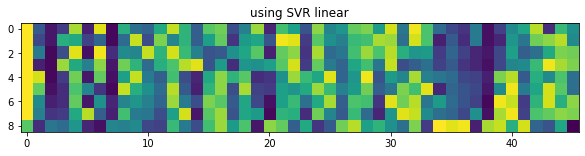

In [ ]:
svr2 = []
for i in range(8):
  svr = SVR(kernel="linear", C=10)
  rfe = RFE(estimator=svr, n_features_to_select=1, step=1)
  rfe.fit(X_train, Y_train[:, i])
  svr2.append(rfe.ranking_)
li = []
for i in range(len(svr2[0])):
  jjj = []
  for j in svr2:
    jjj.append(j[i])
  li.append(jjj)

test = []
for i in range(len(svr2)):
  test.append(svr2[i])



test.append(li2)
fig, ax = plt.subplots(figsize = (10, 50))
plt.title('using SVR linear')
im = ax.imshow(test)
im.autoscale()

In [ ]:
l1 = []
for j in svr2:
  for i in range(0 ,11):
    for k in range(len(j)):
      if (j[k] == i):
        print(head[k])
  print("____")

SCrD
LOS
Age
IBW
D_Age
TACDkg
mTOR_Dose
Height
Kidney_transplantation
mTOR_Protocol
____
SCrD
LOS
Age
ATG_Tota_dose
Kidney_transplantation
mTOR_Dose
HBV_before_RT
D_Height
IBW
Sex
____
Age
IBW
LOS
D_Age
mTOR_Level
SCrD
D_Height
ATG_Tota_dose
mTOR_Dose
Kidney_transplantation
____
Age
LOS
SCrD
Sex
mTOR_Level
HBV_before_RT
mTOR_Dose
D_Height
ATG_Tota_dose
Kidney_transplantation
____
Age
SCrD
IBW
LOS
Dialysis_Type
Donor_type
D_Age
Height
mTOR_Level
mTOR_Dose
____
SCrD
Age
LOS
Dialysis_Type
ATG_Tota_dose
Height
BMI
D_Age
Donor_type
mTOR_Level
____
LOS
D_Age
IBW
Age
SCrD
Height
D_CPR
CYP3A4_22_Genotype
mTOR_Level
Donor_type
____
D_Age
LOS
Dialysis_Type
SCrD
D_CPR
D_Height
Age
Height
CYP3A4_22_Genotype
mTOR_Dose
____


Here I have used RFE with cross validation in order to find the optimom number of features to get the best possible output. Following the calculations, the score grid is depicted and the validation score is calculated separately for each column.

Optimal number of features : 27
0.2415833796986595
9.918536471409055


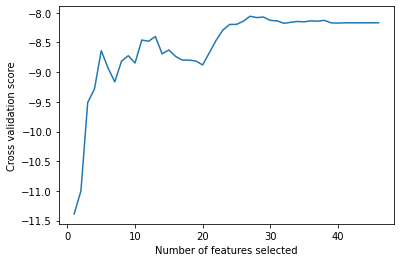

Optimal number of features : 18
0.06687364011105823
10.039767485124772


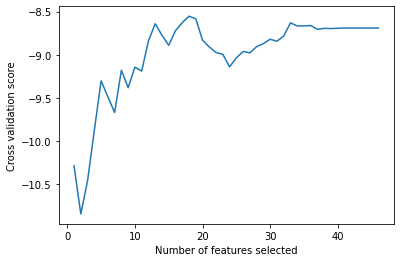

Optimal number of features : 11
0.36388739266854253
10.026939823245016


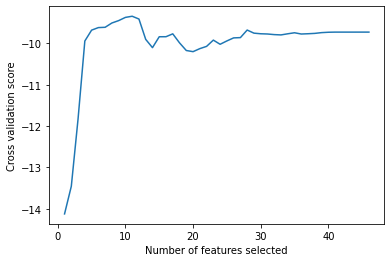

Optimal number of features : 26
0.11272152575694439
10.714711245180776


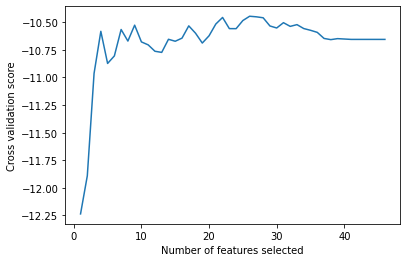

Optimal number of features : 18
0.27163339962442046
13.746739758766871


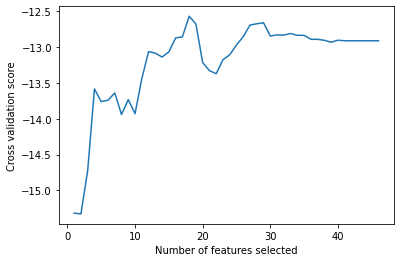

Optimal number of features : 4
0.17307929271436473
13.632504999802897


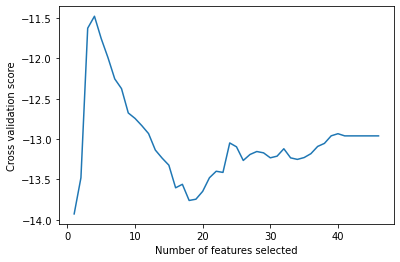

Optimal number of features : 7
0.15358665966334795
20.917787652320904


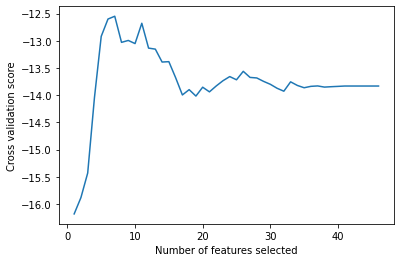

Optimal number of features : 23
0.12928628126306607
19.52192237720722


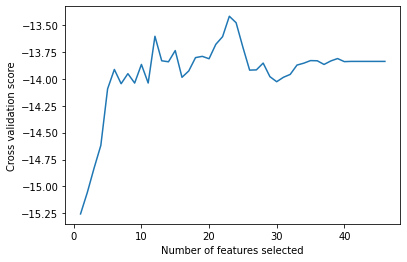

In [ ]:

import matplotlib.pyplot as plt
from sklearn.feature_selection import RFECV
X_train, Y_train, X_val, Y_val, X_test, Y_test = preprocess('V1_Reg.xlsx')
filters = []
sum = 0 
for i in range(8):
  # Create the RFE object and compute a cross-validated score.
  svr = SVR(kernel="linear", C=10)
  # The "accuracy" scoring is proportional to the number of correct
  # classifications
  rfecv = RFECV(estimator=svr, step=1, cv=10, scoring='neg_mean_absolute_error')
  rfecv.fit(X_train, Y_train[:, i])
  from sklearn.metrics import mean_absolute_error
  print("Optimal number of features : %d" % rfecv.n_features_)

  print(rfecv.score(X_val, Y_val[:, i]))
  print(mean_absolute_error(Y_val[:, i], rfecv.predict(X_val)))
  sum += mean_absolute_error(Y_val[:, i], rfecv.predict(X_val))
  # Plot number of features VS. cross-validation scores
  plt.figure()
  plt.xlabel("Number of features selected")
  plt.ylabel("Cross validation score")
  plt.plot(range(1, len(rfecv.grid_scores_) + 1), rfecv.grid_scores_)
  plt.show()
  filters.append(rfecv.get_support())



Here I am listing names of the features with greatest score for each output column.

In [ ]:

import matplotlib.pyplot as plt
from sklearn.feature_selection import RFECV
from sklearn.multioutput import MultiOutputRegressor

X_train, Y_train, X_val, Y_val, X_test, Y_test = preprocess('V1_Reg.xlsx')
from sklearn.neighbors import KNeighborsRegressor
from sklearn.multioutput import MultiOutputRegressor

svr = SVR(kernel="linear", C=10)
knn = KNeighborsRegressor(n_neighbors=8)
regr = MultiOutputRegressor(svr)

regr.fit(X_train,Y_train)
mean_absolute_error(regr.predict(X_val), Y_val)

11.91910298343058

In [ ]:
df = pd.read_excel('V1_Reg.xlsx')
head = list(df.columns)
filt = rfecv.get_support()

for j in filters:
  for i in range(len(j)):
    if (j[i] == True):
      print(head[i])
  print("_____")


Sex
Age
Height
IBW
BMI
SCrD
Dialysis_Type
Duration_Of_Dialysis
Acute_Rejection
HBV_before_RT
Peak_PRA
Donor_type
D_Age
D_Sex
Sex_Similarity
D_BMI
D_DM
D_HTN
D_Cr
eGFR0
DGF
ATG_Tota_dose
LOS
Kidney_transplantation
TACDkg
TACC
TACCDRatio
_____
Sex
Age
Weight
IBW
BMI
SCrD
Dialysis_Type
HBV_before_RT
Donor_type
D_Age
D_Sex
D_BMI
Cause_Of_Death
D_DM
eGFR0
ATG_Tota_dose
LOS
Kidney_transplantation
_____
Age
IBW
SCrD
Duration_Of_Dialysis
Acute_Rejection
D_Height
D_Cr
eGFR0
ATG_Tota_dose
LOS
Kidney_transplantation
_____
Sex
Age
Weight
IBW
BMI
SCrD
TACDDkg
TACCD
Duration_Of_Dialysis
Acute_Rejection
HBV_before_RT
Peak_PRA
Donor_type
D_Age
D_Sex
D_Height
D_BMI
Cause_Of_Death
D_DM
D_HTN
D_Inotrpe
D_Cr
eGFR0
ATG_Tota_dose
LOS
Kidney_transplantation
_____
Sex
Age
IBW
SCrD
Dialysis_Type
Duration_Of_Dialysis
HBV_before_RT
D_Age
D_Sex
D_Height
D_DM
D_HTN
D_Cr
eGFR0
DGF
LOS
TACDkg
TACCDRatio
_____
Age
SCrD
D_DM
LOS
_____
Sex
Age
SCrD
Dialysis_Type
D_DM
DGF
LOS
_____
Sex
Weight
BMI
SCrD
TACDDkg
ESRD_Cause

In [ ]:
sum/8

13.564863726632188

Here I used RFE with cross validation and with a random forests regressor estimator, then I depicted the score grid and calculated the MAE for each column. The output is improved in general.

Optimal number of features : 5
6.437831249999994


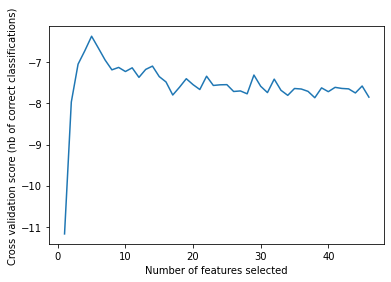

Optimal number of features : 10
4.9107062500000005


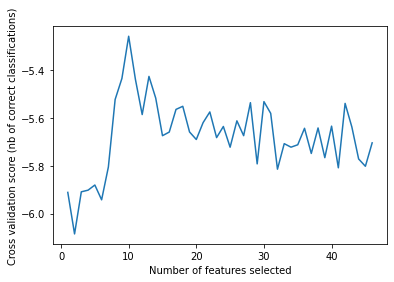

Optimal number of features : 14
10.231568749999987


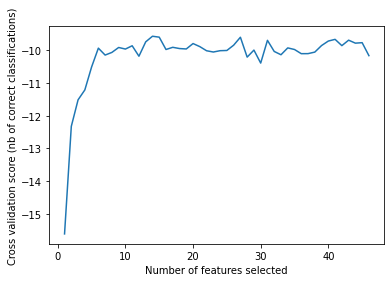

Optimal number of features : 13
5.834687499999989


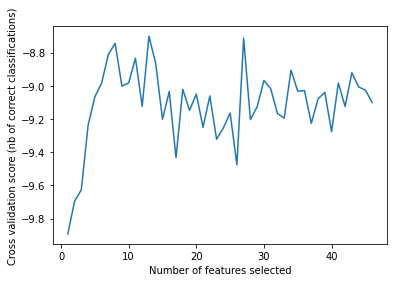

Optimal number of features : 8
14.151699999999996


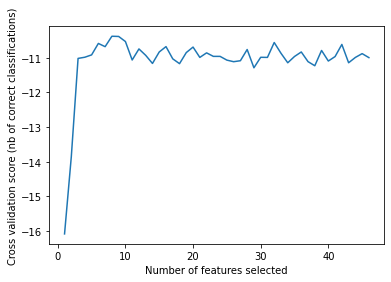

Optimal number of features : 35
13.559618749999995


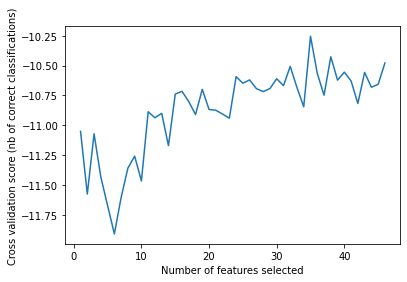

Optimal number of features : 17
17.577061407766983


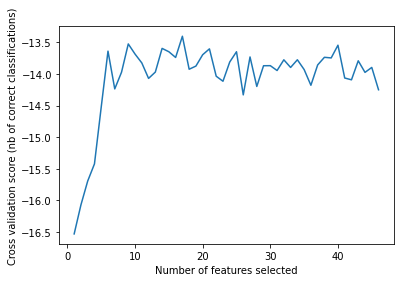

Optimal number of features : 28
16.33012955097087


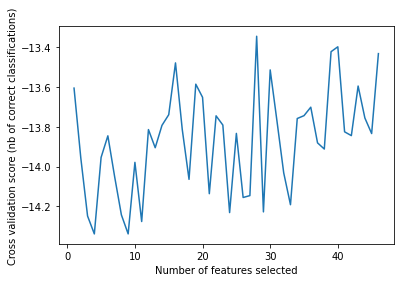

In [ ]:
filters = []
sum = 0 
for i in range(8):
  # Create the RFE object and compute a cross-validated score.
  model = RandomForestRegressor()
  # The "accuracy" scoring is proportional to the number of correct
  # classifications
  rfecv = RFECV(estimator=model, step=1, cv=5, scoring='neg_mean_absolute_error')
  rfecv.fit(X_train, Y_train[:, i])
  from sklearn.metrics import mean_absolute_error
  print("Optimal number of features : %d" % rfecv.n_features_)

  print(mean_absolute_error(Y_val[:, i], rfecv.predict(X_val)))
  sum += mean_absolute_error(Y_val[:, i], rfecv.predict(X_val))
  # Plot number of features VS. cross-validation scores
  plt.figure()
  plt.xlabel("Number of features selected")
  plt.ylabel("Cross validation score (nb of correct classifications)")
  plt.plot(range(1, len(rfecv.grid_scores_) + 1), rfecv.grid_scores_)
  plt.show()
  filters.append(rfecv.get_support())



In [ ]:
df = pd.read_excel('V1_Reg.xlsx')
head = list(df.columns)
filt = rfecv.get_support()

for j in filters:
  for i in range(len(j)):
    if (j[i] == True):
      print(head[i])
  print("_____")


Age
Height
IBW
SCrD
LOS
_____
Sex
Age
Height
BMI
SCrD
TACDDkg
D_Age
D_Weight
ATG_Tota_dose
LOS
_____
Age
Height
IBW
BMI
SCrD
Duration_Of_Dialysis
D_Age
D_BMI
D_Cr
eGFR0
ATG_Tota_dose
LOS
TACDkg
TACCDRatio
_____
Age
Height
SCrD
TACDDkg
Duration_Of_Dialysis
D_Age
D_Height
D_Weight
D_BMI
eGFR0
ATG_Tota_dose
LOS
TACDkg
_____
Age
Height
IBW
SCrD
RatioD
D_Age
eGFR0
LOS
_____
Sex
Age
Height
Weight
IBW
BMI
SCrD
TACDD
TACDDkg
TACCD
RatioD
RatioDkg
ESRD_Cause
Duration_Of_Dialysis
Acute_Rejection
HBV_before_RT
Peak_PRA
Donor_type
D_Age
D_Sex
D_Height
D_Weight
D_BMI
Cause_Of_Death
D_CPR
D_Inotrpe
D_Cr
eGFR0
ATG_Tota_dose
LOS
CYP3A5_Genotype
PCR2group
TACDkg
TACC
TACCDRatio
_____
Age
Height
Weight
IBW
BMI
SCrD
TACDDkg
TACCD
RatioD
D_Age
D_BMI
D_Cr
eGFR0
ATG_Tota_dose
LOS
TACDkg
TACC
_____
Age
Height
Weight
IBW
BMI
SCrD
TACDD
TACDDkg
TACCD
RatioD
RatioDkg
Duration_Of_Dialysis
Acute_Rejection
Peak_PRA
D_Age
D_Height
D_Weight
D_BMI
Cause_Of_Death
D_CPR
D_Cr
eGFR0
ATG_Tota_dose
LOS
CYP3A4_22_Genotype
T

In [ ]:
sum/8

11.129162932342226

In [ ]:
def preprocess(file):
  df = pd.read_excel(file)
  df = df[0:109]
  dataset = df.values
  #[dataset[i].shape for i in range(len(dataset))]
  dataset = dataset[:109]
  dataset = np.array([[float(dataset[i][j]) for j in range(len(dataset[0]))] for i in range(len(dataset))])
  min_max_scaler = preprocessing.MinMaxScaler()
  X_scale = min_max_scaler.fit_transform(dataset)
  Y = dataset[:, -12:]
  X_scale = X_scale[:, :-12]
  X_train, X_val_and_test, Y_train, Y_val_and_test = train_test_split(X_scale, Y, test_size=0.3, shuffle = True)
  #X_val, X_test, Y_val, Y_test = train_test_split(X_val_and_test, Y_val_and_test, test_size=0.5, shuffle = True)
  return X_train, Y_train, X_val_and_test, Y_val_and_test

In [ ]:
X_train, Y_train, X_val_and_test, Y_val_and_test, = preprocess('V1_Cla.xlsx')

In [ ]:
from sklearn import svm
from sklearn.metrics import classification_report
from imblearn.over_sampling import RandomOverSampler
from sklearn.multioutput import MultiOutputClassifier
from imblearn.over_sampling import SMOTE, ADASYN
from imblearn.over_sampling import SMOTENC

ros = RandomOverSampler()

X_resampled, Y_resampled = SMOTE().fit_resample(X_train, Y_train[:, 7])
classifier = svm.SVC(kernel='linear')

classifier.fit(X_resampled, Y_resampled)
#regr_1.fit(X_train, Y_train)

# Predict
#y_1 = classifier.score(X_val,m.transform(Y_val[:, 3:5]))
yyy = classifier.predict(X_val_and_test)
print(classification_report(Y_val_and_test[:, 7],yyy))

/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


ValueError: ignored

In [ ]:
X_train, Y_train, X_val_and_test, Y_val_and_test, = preprocess('V1_Cla.xlsx')

In [ ]:
from sklearn.ensemble import RandomForestClassifier
classifier = RandomForestClassifier(n_estimators=1000)
classifier.fit(X_resampled, Y_resampled)

yyy = classifier.predict(X_val_and_test)
print(classification_report(Y_val_and_test[:, 7],yyy))

              precision    recall  f1-score   support

         0.0       0.92      0.83      0.87        29
         1.0       0.29      0.50      0.36         4

    accuracy                           0.79        33
   macro avg       0.60      0.66      0.62        33
weighted avg       0.85      0.79      0.81        33



In [ ]:
Y_train[:, 4]